# Import necessary libraries

In [79]:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Data Collecting Part

In [80]:
def load_dataset(url):
    return pd.read_csv(url)

lisa_df = load_dataset('Visa_For_Lisa_Loan_Modelling.csv')

# Data Exploration Part

In [81]:
def summarize_dataset(dataset):
    # Shape
    print("Dataset dimension:")
    print(dataset.shape)

    # First 10 rows
    print("\nFirst 10 rows of dataset:")
    print(dataset.head(10))

    # Statistical summary
    print("\nStatistical summary:")
    print(dataset.describe())
    
summarize_dataset(lisa_df)

Dataset dimension:
(5000, 14)

First 10 rows of dataset:
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  Cred

# Data Cleaning Part

In [82]:
def clean_dataset(df):
    df.drop('ID', axis=1, inplace=True)
    df['Experience'] = df['Experience'].abs()

    return df
cleaned_lisa_df = clean_dataset(lisa_df)

# Data Visualization Part

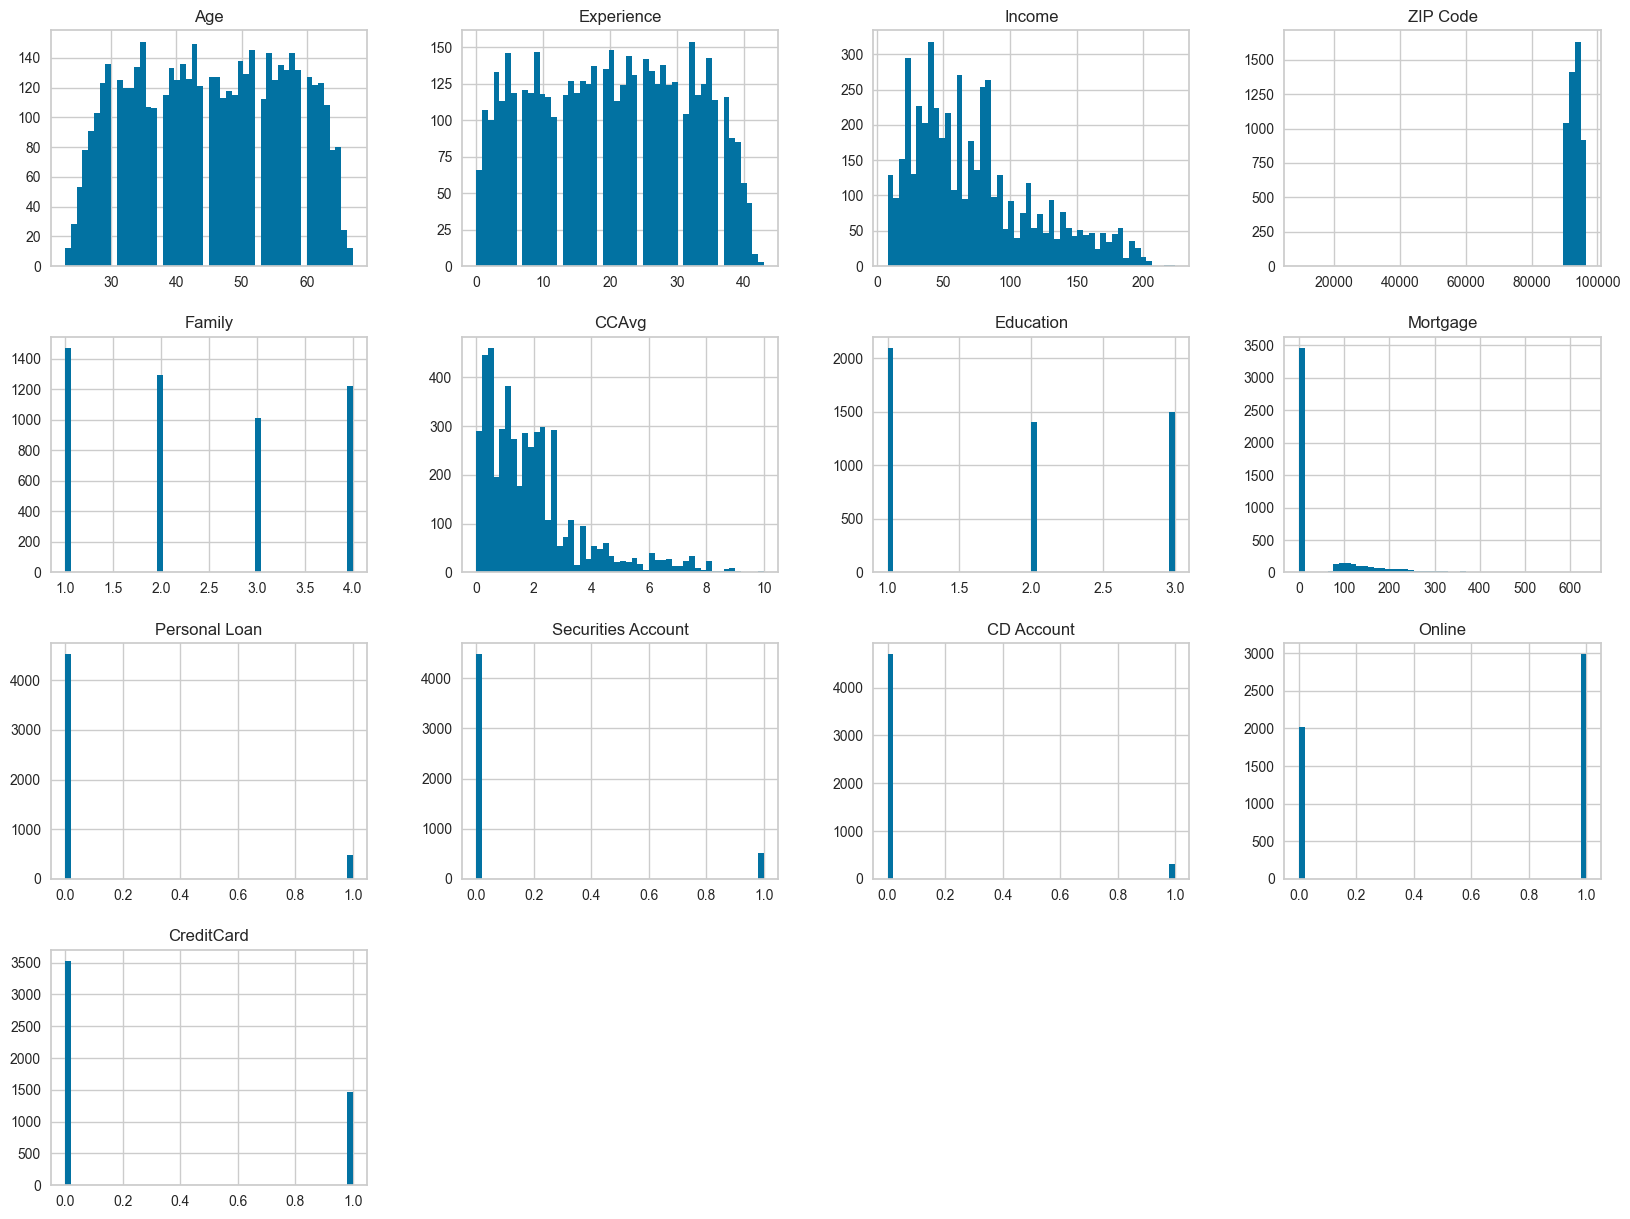

In [83]:

# Print histograms
def print_histograms(dataframe):
    dataframe.hist(bins=50, figsize=(20,15))
    plt.show()
    
print_histograms(cleaned_lisa_df)

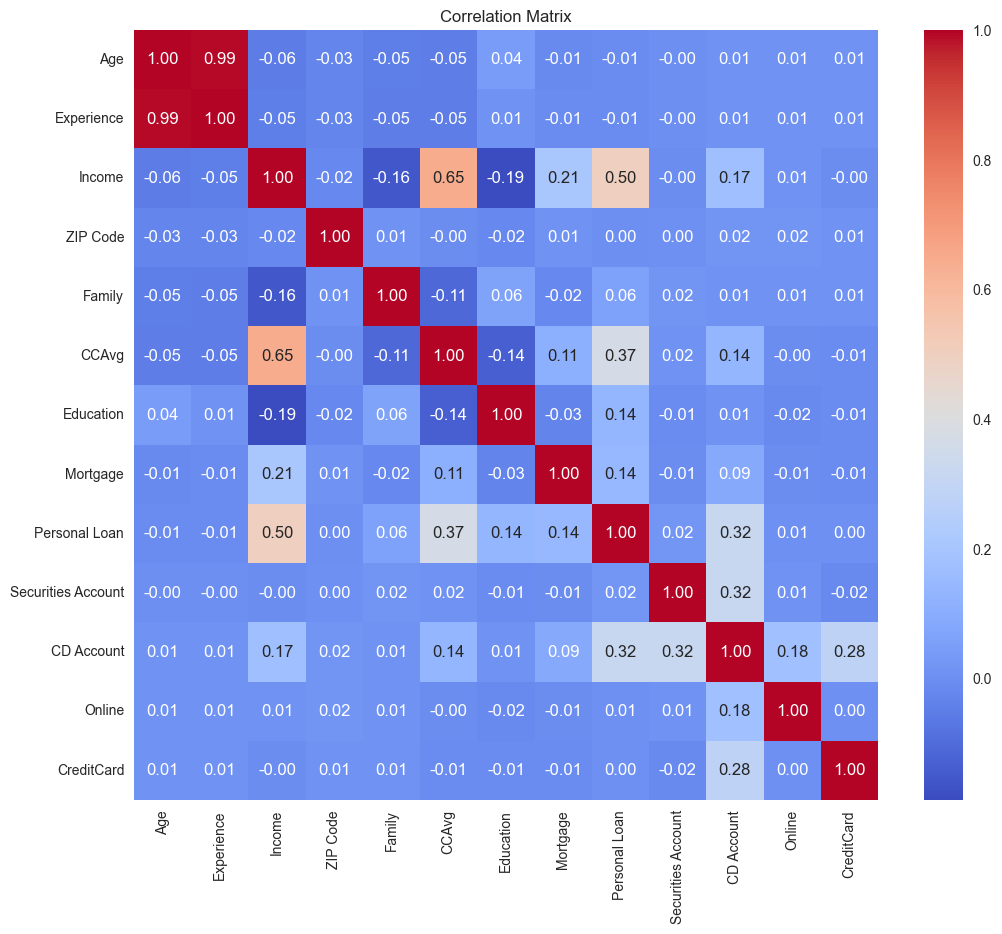

In [84]:


def compute_correlations_matrix(dataframe):
    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Create a heatmap using seaborn
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

compute_correlations_matrix(cleaned_lisa_df)

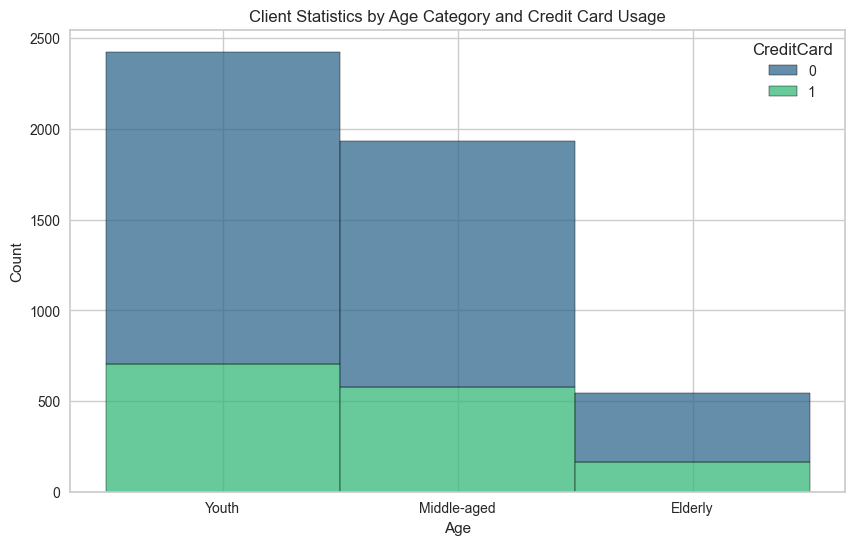

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

def age_category(dataframe):
    bins = [25, 45, 60, float('inf')]
    labels = ['Youth', 'Middle-aged', 'Elderly']
    df = dataframe.copy()
    df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Age', hue='CreditCard', multiple='stack', palette='viridis')
    plt.title('Client Statistics by Age Category and Credit Card Usage')
    plt.show()

age_category(cleaned_lisa_df)

    

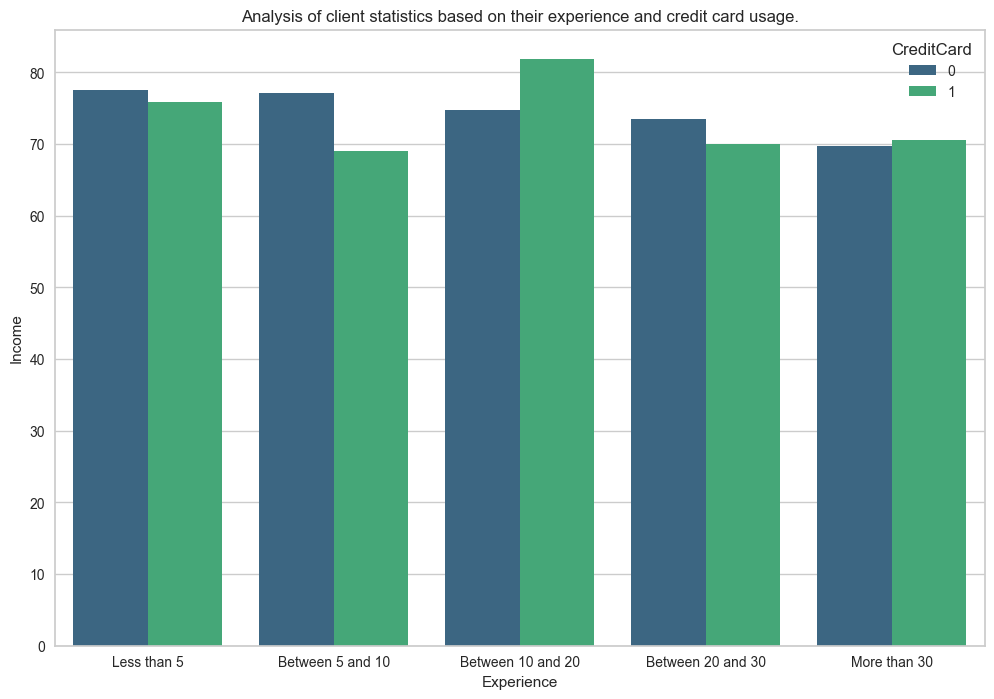

In [93]:
def exp_card(dataframe):
    bins = [0, 5, 10, 20, 30, float('inf')]
    labels = ['Less than 5', 'Between 5 and 10', 'Between 10 and 20', 'Between 20 and 30', 'More than 30']
    df = dataframe.copy()
    df['Experience'] = pd.cut(df['Experience'], bins=bins, labels=labels)
    df = df.groupby(['CreditCard', 'Experience'])['Income'].mean().reset_index()
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='Experience', y='Income', hue='CreditCard', palette='viridis')
    plt.title('Analysis of client statistics based on their experience and credit card usage.')
    plt.ylabel('Income')
    plt.show()

exp_card(cleaned_lisa_df)

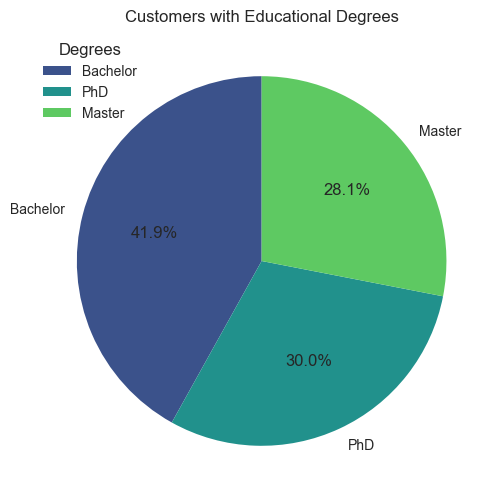

In [94]:
def education_degree(dataframe):
    df = dataframe.copy()
    degree_mapping = {1: 'Bachelor', 2: 'Master', 3: 'PhD'}
    df['Education'] = df['Education'].map(degree_mapping)
    
    degree_counts = df['Education'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(degree_counts, labels=degree_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(degree_counts)))
    plt.title('Customers with Educational Degrees')
    plt.legend(title='Degrees')
    plt.show()

education_degree(cleaned_lisa_df)

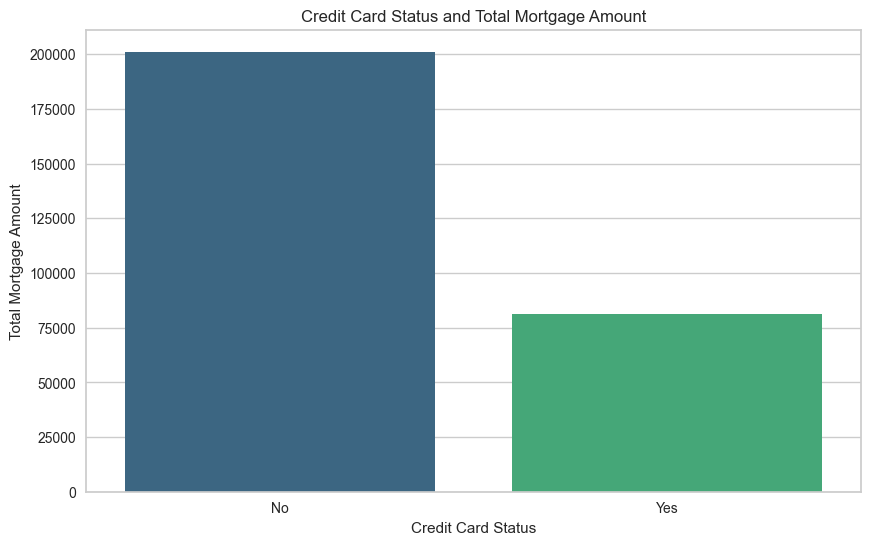

In [95]:

def creditcard_status(dataframe):
    df = dataframe.groupby('CreditCard')['Mortgage'].sum()
    df.rename(index={0: 'No', 1: 'Yes'}, inplace=True)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df.index, y=df.values, palette='viridis')
    plt.title('Credit Card Status and Total Mortgage Amount')
    plt.xlabel('Credit Card Status')
    plt.ylabel('Total Mortgage Amount')
    plt.show()

creditcard_status(cleaned_lisa_df)

In [89]:
cleaned_lisa_df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Machine Learning Part

In [90]:
X = cleaned_lisa_df.drop('Personal Loan', axis=1)
y = cleaned_lisa_df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

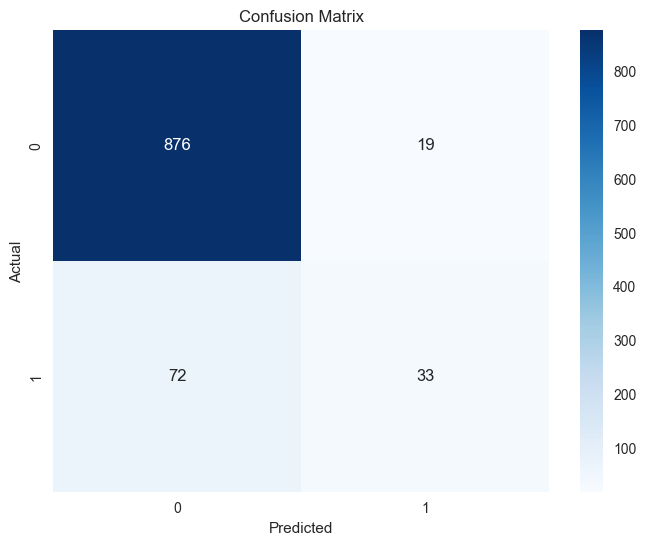


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       895
           1       0.63      0.31      0.42       105

    accuracy                           0.91      1000
   macro avg       0.78      0.65      0.69      1000
weighted avg       0.89      0.91      0.89      1000



In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Convert target variable y to binary (0 or 1)
y_binary = (y > y.mean()).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Logistic Regression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_logistic)
print("\nClassification Report:")
print(class_report)


# Communication Part
# Loan Acceptance Prediction Model Performance Report
# Classification Report:

|              | Precision | Recall | F1-Score | Support |
|--------------|-----------|--------|----------|---------|
| 0            | 0.92      | 0.98   | 0.95     | 895     |
| 1            | 0.63      | 0.31   | 0.42     | 105     |
|--------------|-----------|--------|----------|---------|
| Accuracy     |           |        | 0.91     | 1000    |
| Macro Avg    | 0.78      | 0.65   | 0.69     | 1000    |
| Weighted Avg | 0.89      | 0.91   | 0.89     | 1000    |

# Communication Part

## Loan Acceptance Prediction Model Performance Report

### Model Performance:

#### Logistic Regression:

- Precision: 0.92
- Recall: 0.98
- F1-Score: 0.95
- Support: 895

#### Logistic Regression:

- Precision: 0.63
- Recall: 0.31
- F1-Score: 0.42
- Support: 105

#### Accuracy: 0.91

#### Macro Avg:

- Precision: 0.78
- Recall: 0.65
- F1-Score: 0.69
- Support: 1000

#### Weighted Avg:

- Precision: 0.89
- Recall: 0.91
- F1-Score: 0.89
- Support: 1000

### Implications:

- Model Reliability: The model shows high precision and recall for predicting non-loan acceptance but lower performance for predicting loan acceptance, indicating potential bias or imbalance in the dataset.
- Model Overfitting: Further analysis is needed to ensure the model generalizes well to new data and does not overfit the training data.

### Recommendations:

- Feature Importance: Identify and prioritize features that contribute most to loan acceptance prediction to improve model performance.
- Model Refinement: Consider using techniques such as feature engineering, hyperparameter tuning, or ensemble methods to enhance model performance.
- Continuous Monitoring: Regularly evaluate the model's performance and update it as needed to maintain effectiveness.

Overall, the logistic regression model shows potential for predicting loan acceptance, but further refinement and monitoring are recommended to enhance its accuracy and effectiveness.


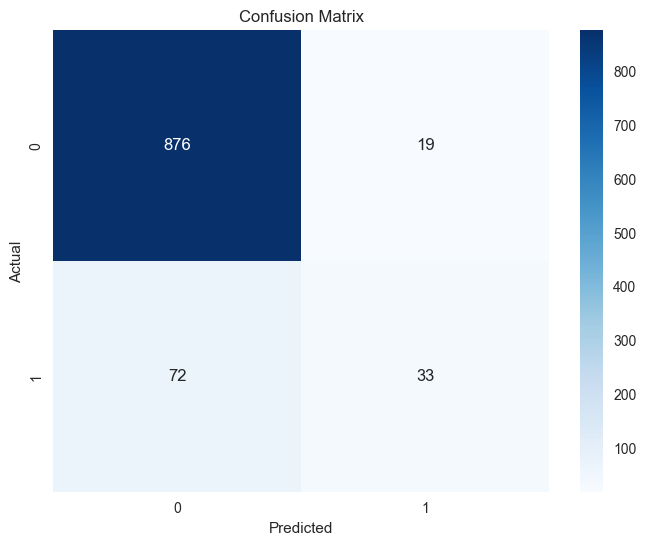


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       895
           1       0.63      0.31      0.42       105

    accuracy                           0.91      1000
   macro avg       0.78      0.65      0.69      1000
weighted avg       0.89      0.91      0.89      1000

